from utils import 

In [ ]:
from utils import graph_plot
import networkx as nx
import json

graph_file = '../dist/topos/deepPlace-200-0.json'

with open (graph_file, 'r') as f:
    graph = json.load(f)
    G = nx.node_link_graph(graph)

graph_plot(G)


In [ ]:
from endnodes_gen import endnode_graph_gen
from iter_kms_ga import iterate_kms_ga
from grid_steiner import construct_steiner_tree
from waxman_topo_gen import construct_waxman
import os
topo_num = 1
endnode_nums = [25]#, 25], 50, 200, 400, 800]
endnodes_files = []

# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")

endnodes_files = [f for f in os.listdir("../dist/endnodes/")]# if os.path.isfile(f)]
endnodes_files = ["../dist/endnodes/" + f for f in endnodes_files]

print (endnodes_files)

for f in endnodes_files:
    
    # construct_steiner_tree(f)
    # print ("steiner tree generated for " + f)
    # iterate_kms_ga(f)
    # print ("kms ga generated")
    construct_waxman(f, degree=5, edge_len=1000)  
    print ("waxman graph generated for " + f)

In [ ]:
from resource_allocation import allocate_resource
import os

topo_files = [f for f in os.listdir("../dist/topos/")]

# topo_files = ["deepPlace-25-3.json"]


for f in topo_files:
    print("allocating resource for " + f)
    # if topo_files is "waxman-x-y.json"
    if f.split("-")[0] == "steiner":
        
      allocate_resource(topo_file_name=f, k=1, topo_allocated_file_name=f) 
      
    else:
      try :
        allocate_resource(topo_file_name=f, k=2, topo_allocated_file_name=f)
      except:
        allocate_resource(topo_file_name=f, k=1, topo_allocated_file_name=f)
    print ("resource allocated for " + f)
              

In [ ]:
topo_num = 10
endnode_nums = [100, 25, 50, 200, 400]
endnodes_files = []

for i in range(topo_num):
    for endnode_num in endnode_nums:
        f = endnode_graph_gen(endnode_num, i)
        endnodes_files.append(f)

for f in endnodes_files:
    construct_steiner_tree(f)
    # print ("steiner tree generated")
    # iterate_kms_ga(f)

In [ ]:
from endnodes_gen import endnode_graph_gen
from iter_kms_ga import iterate_kms_ga
from grid_steiner import construct_steiner_tree
from waxman_topo_gen import construct_waxman
import os
from multiprocessing import Pool

def process_file(f):
    # construct_steiner_tree(f)
    # print("Steiner tree generated for", f)
    iterate_kms_ga(f)
    print("KMS GA generated for", f)
    # construct_waxman(f, 5, 1000)
    # print("Waxman graph generated for", f)




topo_num = 10
endnode_nums = [400]#, 25, 50, 200, 400]
endnodes_files = []

# 生成文件列表
# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# endnodes_files = [f for f in os.listdir("../dist/endnodes/")]# if os.path.isfile(f)]

# endnodes_files = ["../dist/endnodes/" + f for f in endnodes_files]

prefix = "../dist/endnodes/endnodesLocs-100-"
for i in [0, 8, 9]:
    endnodes_files.append(prefix + str(i) + ".json")

print("number of endnodes_files is ", len(endnodes_files))

with Pool(processes=os.cpu_count()) as pool:
    # Map process_file function to each file in the list
    pool.map(process_file, endnodes_files)

In [ ]:
from utils import add_dis_attr_to_edges, graph_plot
import json
import os
import networkx as nx
from multiprocessing import Pool

def process_file(f):
    print("Processing ", f)
    sf = str(f)
    with open("../dist/topos/" + str(f), 'r+') as f:
        graph = json.load(f)
        G = nx.node_link_graph(graph)
        G = add_dis_attr_to_edges(G)
        # graph_plot(G)
        print("Processed ", f)
    with open("../dist/test/" + sf, 'w') as f:
        json.dump(nx.node_link_data(G), f)
        # graph_plot(G)


topo_files = [f for f in os.listdir("../dist/topos/")]

print("number of topo_files is ", len(topo_files))

# with Pool(processes=os.cpu_count()) as pool:
#     # Map process_file function to each file in the list
#     pool.map(process_file, topo_files)

for f in topo_files:
    process_file(f)



        
        

Number of nodes in G: 325
[17.012999966508403, 747.7455544292218]
(33.333333333333336, 766.6666666666667)


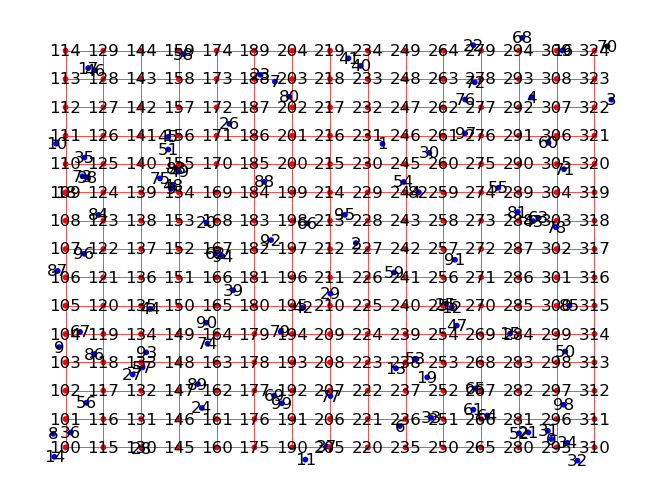

225
add edge fuck 86 102 99.93706456032132
add edge fuck 86 101 160.9652975081273


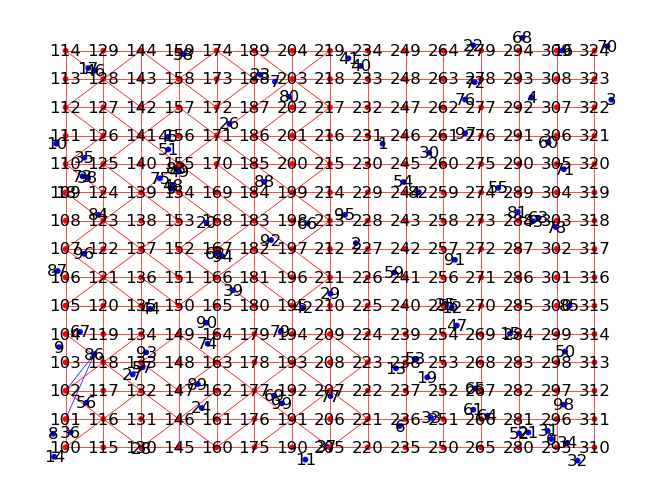

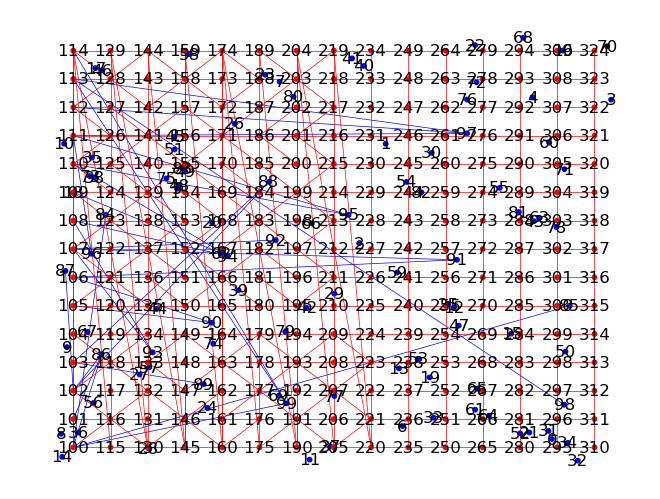

In [2]:
# to Verify equavalence between connect the endnode to 4 point of the grid which it in and Delaunay triangulation
from utils import read_endnodes_init_grid_graph_with_grid_edges, graph_plot
from scipy.spatial import Delaunay
import math
import numpy as np
l_er = 200
l_rr = 200
endnodes_files = []

prefix = "../dist/endnodes/endnodesLocs-100-"
for i in [0]:
    endnodes_files.append(prefix + str(i) + ".json")


G, endnodes = read_endnodes_init_grid_graph_with_grid_edges(endnodes_files[0])

for e in endnodes:
    if G.nodes[e]['pos'][0] > 1000 or G.nodes[e]['pos'][1] > 1000:
        print(G.nodes[e]['pos'])

print(G.nodes[10]['pos'])
print(G.nodes[111]['pos'])

graph_plot(G)

node_positions = []
for node in G.nodes:
    if G.nodes[node]['type'] == 'repeater':
        node_positions.append(list(G.nodes[node]['pos']))
points = np.array(node_positions)
print(len(points))
tri = Delaunay(points)
# remove all edges from G
# print("beofre remove edges:", G.edges())
# plot_and_metrics(G)
# G.remove_edges_from(G.edges())
# Add edges to G
for triangle in tri.simplices:
    for i in range(3):
        u = triangle[i]
        v = triangle[(i + 1) % 3]
        pos1 = G.nodes[u]['pos']
        pos2 = G.nodes[v]['pos']
        distance = math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)
        if G.nodes[u]['type'] == 'endnode' and G.nodes[v]['type'] == 'repeater':
            if distance <= l_er:
                print("add edge fuck", u, v, distance)  
                G.add_edge(u, v, type='endnode', len=distance)
        if G.nodes[u]['type'] == 'repeater' and G.nodes[v]['type'] == 'repeater':
            if distance <= l_rr:
                G.add_edge(u, v, type='repeater', len=distance)

graph_plot(G)


for triangle in tri.simplices:
    for i in range(3):
        u = triangle[i]
        v = triangle[(i + 1) % 3]
        pos1 = G.nodes[u]['pos']
        pos2 = G.nodes[v]['pos']
        distance = math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)
        if G.nodes[u]['type'] == 'endnode' and G.nodes[v]['type'] == 'repeater':
            if distance <= 1000000000:
                G.add_edge(u, v, type='endnode', len=distance)
        if G.nodes[u]['type'] == 'repeater' and G.nodes[v]['type'] == 'repeater':
            if distance <= 10000000000:
                G.add_edge(u, v, type='repeater', len=distance)


graph_plot(G)